# pytorch computer vision

# 0.  computer vision libraries in pytorch

*  `torchvision` - base domain library for pytorch computer vision
*  `torchvision.datasets` - get datasets and data loading functions for computer vision here
*  `torchvision.models` - get pretrained computer vision models that you can leverage ffor yout own problems
*  `torchvision.transforms` - functions for manipulating images to be suitable for use with an ML model
*  `torch.utils.data.Dataset` - base dataset class for pytorch
*   `torch.utils.data.DataLoader` - creates a python iterable over a dataset

In [ ]:
# import pytorch
import torch
from torch import nn
# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
# import matplotlib for visualize
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)


2.5.0+cu121
0.20.0+cu121


# getting datasets
the dataset we will be using is FashionMNIST  

In [ ]:
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # do we want the training dataset?
    transform=ToTensor(), # how do we want to transform the data?
    target_transform=None, # how do we want to transform the labels/targets?
    download=True #do we want to download yes/no?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    transform=ToTensor(),
    target_transform=None,
    download=True
)


100%|██████████| 26.4M/26.4M [00:01<00:00, 13.3MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 210kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.90MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 17.3MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
image , label = train_data[0]
image , label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

# check input output shapes of data

In [ ]:
print(f"image shape: {image.shape} -> color_channels , height , width") # color channel is 1 because our data is in black and white where white means 0 and black is 1
print(f"image label: {label}")

image shape: torch.Size([1, 28, 28]) -> color_channels , height , width
image label: 9


# visualing our data


Text(0.5, 1.0, 'Ankle boot')

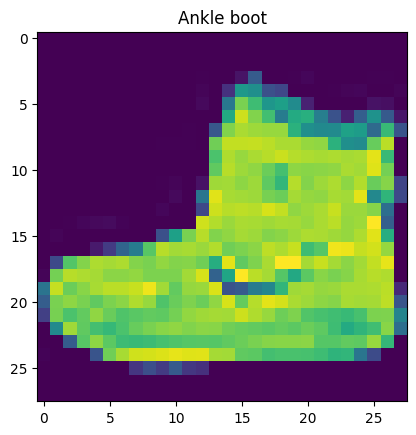

In [ ]:
plt.imshow(image.squeeze())
plt.title(class_names[label])


(-0.5, 27.5, 27.5, -0.5)

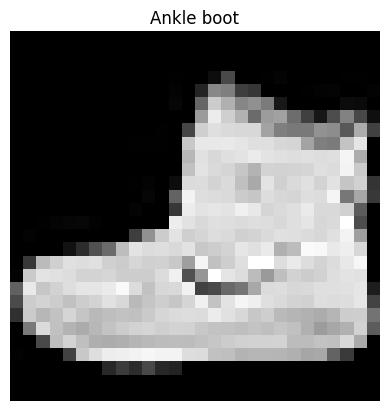

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

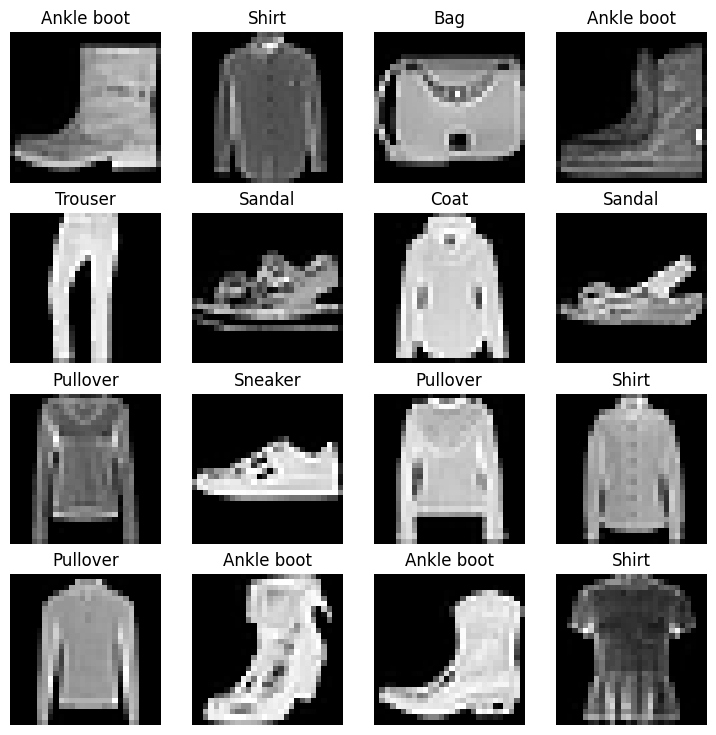

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows , cols = 4,4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img , label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.axis(False)
  plt.title(class_names[label])


# prepare dataloader

right now , our data is in the form of pytorch datasets

dataloader tuns our datasets into python iterable

more specifically , dataloader turns our datasets into batches

why would we do this?

1. it is more computationally efficient, as in , your computing hardware may not be able to look at 60k images in one hit.
so we break it down to 32 images at a time ( batch size of 32)
2. it gives our neural network more chance to update its gradient pre epoch.

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data ,
                              batch_size=BATCH_SIZE ,
                              shuffle=True)
# we shuffle the data so that our model could learn more corners , shape rather than order

test_dataloader = DataLoader(dataset=test_data ,
                              batch_size=BATCH_SIZE ,
                              shuffle=False)
# here we dont specifically shuffle the data because it is not too necessary as our model dont see this
# data while training also while shuffle there might be slight change in accuracy,precision,recall

In [ ]:
print(f"Dataloaders: {train_dataloader , test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7b29016b2c50>, <torch.utils.data.dataloader.DataLoader object at 0x7b29016b3e50>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [ ]:
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape , train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image size: torch.Size([1, 28, 28])
label: 8


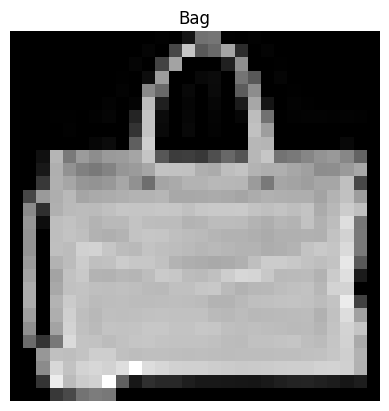

In [ ]:
#torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img , label = train_features_batch[random_idx] , train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.axis(False)
plt.title(class_names[label])
print(f"image size: {img.shape}")
print(f"label: {label}")

# model 0: build a baseline model

when starting to build a series of machine learning modelling experiments, its best practice to start with a baseline model.

A baseline model is a simple model that is used as a benchmark for evaluating the performance of more complex models.

In [ ]:
# create a flatten layer
flatten_model = nn.Flatten()

# get a single sample
x = train_features_batch[0]

# flatten sample
output = flatten_model(x)

# print out when happened
print(f"shape before flatten: {x.shape}")
print(f"shape after flatten: {output.shape}")

shape before flatten: torch.Size([1, 28, 28])
shape after flatten: torch.Size([1, 784])


In [ ]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )
  def forward(self,x):
    return self.linear_layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(784,10,len(class_names))
model_0

FashionMNISTModelV0(
  (linear_layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

# loss , optimizer and evaluations metrics

* since it is multi class so we use Cross Entropy loss fn
* SGD as optimizer
* since it is classification model , we take accuracy as evaluation metric

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)
# with open means create a file name helper_functions with write binary and
# f.write means write content there from request

downloading helper_functions.py


In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.1)

# creating a functions to time our experiments

Machine learning is very experimental.

Two of the main things you will often want to track are :

1. model performance(loss,acc,etc)
2. how fast it runs

In [ ]:
from timeit import default_timer as timer

def print_train_time(start:float,
                    end:float ):
  total_time = end - start
  print(f"Train time: {total_time: .3f}")
  return total_time



In [ ]:
start_time= timer()
# some code
end_time = timer()
print_train_time(start=start_time,end=end_time)

Train time:  0.000


6.498500000873264e-05

# creating a training loop and training a model on batches of data

In [ ]:
from tqdm.auto import tqdm
torch.manual_seed(42)
start_timer = timer()
epochs = 3
for epoch in tqdm(range(epochs)): # tqdm is for progress bar
  print(f"Epoch: {epoch}\n---------")
  train_loss = 0
  for batch,(X,y) in enumerate(train_dataloader): # enumerate is used to track batch number
    model_0.train()
    y_pred = model_0(X)
    loss = loss_fn(y_pred,y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch % 400 == 0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")
  train_loss /= len(train_dataloader)

  test_loss,test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      test_pred = model_0(X_test)
      test_loss += loss_fn(test_pred,y_test)
      test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
  print(f"Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.2f}")
end_timer = timer()
total_time_model_0 = print_train_time(start=start_timer,end=end_timer)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.5904 | Test loss: 0.5095 | Test acc: 82.04
Epoch: 1
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.4763 | Test loss: 0.4799 | Test acc: 83.20
Epoch: 2
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.4550 | Test loss: 0.4766 | Test acc: 83.43
Train time:  43.419


# make predictions and get Model results

In [ ]:
torch.manual_seed(42)
def eval_model(
    model:torch.nn.Module,
    loss: torch.nn.Module,
    accuracy_fn,
    dataloader:torch.utils.data.DataLoader):
  model.eval()
  with torch.inference_mode():
    test_loss,test_acc = 0,0
    for X,y in tqdm(dataloader):
      test_pred  = model(X)
      test_loss += loss(test_pred,y)
      test_acc += accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
  return {"model_name":model.__class__.__name__,
          "model_loss":test_loss.item(),
          "model_acc":test_acc}


In [ ]:
model_0_results = eval_model(model=model_0,
                             loss=loss_fn,
                             accuracy_fn=accuracy_fn,
                             dataloader=test_dataloader)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
class FashionMNISTModelV1 (nn.Module):
  def __init__(self,
              in_features:int,
              out_features:int,
              hidden_units:int):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=in_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=out_features)
    )
  def forward(self,x):
    return self.linear_layer_stack(x)


In [ ]:
img , label = train_data[0]
print(train_data.class_to_idx) # out features 10
print(flatten_model(img).shape) # in features 784
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(784,10,10)

{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}
torch.Size([1, 784])


In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1)

# functionizing traiining and testing   

In [ ]:
def train_step(
    model:torch.nn.Module,
    loss_fn:torch.nn.Module,
    optimizer:torch.optim.Optimizer,
    dataloader:torch.utils.data,
    accuracy):

    train_loss,train_acc = 0,0
    for batch,(X,y) in enumerate(dataloader): # enumerate is used to track batch number
      model.train()
      y_pred = model(X)
      loss = loss_fn(y_pred,y)
      train_loss += loss
      train_acc += accuracy(y_true=y,y_pred=y_pred.argmax(dim=1))
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    print(f"Train loss: {train_loss:.4f} | Train acc: {train_acc:.2f}%")



In [ ]:
X.shape

torch.Size([32, 1, 28, 28])

In [ ]:
def test_step(
    model:torch.nn.Module,
    loss_fn:torch.nn.Module,
    dataloader:torch.utils.data,
    accuracy):
  """ perform a testing loop step on model going over data_loader"""
  test_loss,test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X_test,y_test in dataloader:
      test_pred = model(X_test)
      test_loss += loss_fn(test_pred,y_test)
      test_acc += accuracy(y_true=y_test,
                           y_pred=test_pred.argmax(dim=1))
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
    print(f"Test loss: {test_loss:.4f} | Test acc: {test_acc:.2f}%")

In [ ]:
from timeit import default_timer as timer
torch.manual_seed(42)
start_timer = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(model=model_1,
             loss_fn=loss_fn,
             optimizer=optimizer,
             dataloader=train_dataloader,
             accuracy=accuracy_fn)
  test_step(model=model_1,
            loss_fn=loss_fn,
            dataloader=test_dataloader,
            accuracy=accuracy_fn)
end_timer = timer()
total_time_model_1 = print_train_time(start=start_timer,end=end_timer)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.6677 | Train acc: 75.88%
Test loss: 0.5009 | Test acc: 82.09%
Epoch: 1
---------
Train loss: 0.4834 | Train acc: 82.77%
Test loss: 0.4890 | Test acc: 82.69%
Epoch: 2
---------
Train loss: 0.4495 | Train acc: 83.87%
Test loss: 0.4858 | Test acc: 82.89%
Train time:  38.509


In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
model_1_results = eval_model(model=model_1,
                             loss=loss_fn,
                             accuracy_fn=accuracy_fn,
                             dataloader=test_dataloader)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.48580455780029297,
 'model_acc': 82.8873801916933}

** note :** sometimes, depending on your data/hardware we might find that our model trains faster on cpu than gpu.

why is this?
1. it could be that the overhead for copying data/hardware to and from the GPU outweights the compute benefits offfered by the gpu.
2. the hardware we are using has a better CPU in terms compute capability than GPU

for CNN :- https://poloclub.github.io/cnn-explainer/

In [ ]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self ,
               input_features:int ,
               output_features:int ,
               hidden_units:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_features,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_features)
    )
  def forward(self,x):
    z = self.conv_block_1(x)
    z = self.conv_block_2(z)
    z = self.classifier(z)
    return z




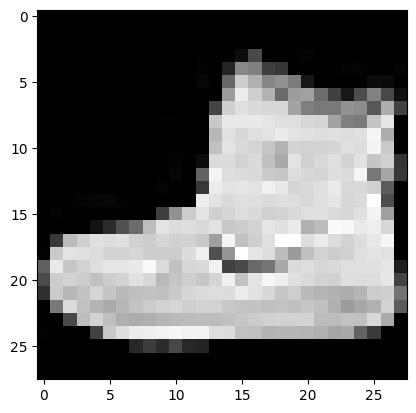

In [ ]:
plt.imshow(img.squeeze(),cmap="gray")

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_features=1,
                              output_features=len(class_names),
                              hidden_units=10)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
torch_random_tensor = torch.rand(size=(1,1,28,28))
torch_random_tensor.shape

torch.Size([1, 1, 28, 28])

In [ ]:
model_2(torch_random_tensor)

tensor([[ 0.0372, -0.0748,  0.0573, -0.0396, -0.0098,  0.0194, -0.0003, -0.0114,
          0.0206,  0.0003]], grad_fn=<AddmmBackward0>)

in features for conv layer is no of color channnel and since our image is in black and white so it is 1

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_features=1,
                              output_features=len(class_names),
                              hidden_units=10)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

# stepping through `nn.Conv2d()`

In [ ]:
torch.manual_seed(42)
images = torch.rand(size=(32,3,64,64))
test_image = images[0]
print(f"shape of images: {images.shape}")
print(f"shape of test image: {test_image.shape}")
print(f"test image: {test_image}")

shape of images: torch.Size([32, 3, 64, 64])
shape of test image: torch.Size([3, 64, 64])
test image: tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         [0.7310, 0.9

In [ ]:
# create a single conv2d layer
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)
conv_output = conv_layer(test_image)
conv_output1 = conv_layer(images)


In [ ]:
print(f"shape of conv_output: {conv_output.shape}")
print(f"shape of conv_output1: {conv_output1.shape}")

shape of conv_output: torch.Size([10, 62, 62])
shape of conv_output1: torch.Size([32, 10, 62, 62])


In [ ]:
test_image

tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         [0.7310, 0.9307, 0.2847,  ..., 0.8432, 0.8307, 0.0897],
         [0.7021, 0.5967, 0.7744,  ..., 0.8485, 0.4520, 0.

#stepping thr `nn.Maxpool2d`

In [ ]:
print(f"original test image size: {test_image.shape}")
print(f"test image with unsqueezed dimension:{test_image.unsqueeze(0).shape}")

max_pool_layer = nn.MaxPool2d(kernel_size=2)

test_image_through_conv = conv_layer(test_image)
print(f"shape after going thr conv layer: {test_image_through_conv.shape}")

test_image_through_maxpool = max_pool_layer(test_image_through_conv)
print(f"shape after going thr maxpool layer: {test_image_through_maxpool.shape}")

original test image size: torch.Size([3, 64, 64])
test image with unsqueezed dimension:torch.Size([1, 3, 64, 64])
shape after going thr conv layer: torch.Size([10, 62, 62])
shape after going thr maxpool layer: torch.Size([10, 31, 31])


In [ ]:
torch.manual_seed(42)
random_tensor = torch.rand(size=[1,1,2,2])
print(f"random tensor:{random_tensor}")
print(f"random tensor shape:{random_tensor.shape}")
max_pool_tensor = max_pool_layer(random_tensor)
print(f"max pool tensor:{max_pool_tensor}")
print(f"max pool tensor shape:{max_pool_tensor.shape}")

random tensor:tensor([[[[0.8823, 0.9150],
          [0.3829, 0.9593]]]])
random tensor shape:torch.Size([1, 1, 2, 2])
max pool tensor:tensor([[[[0.9593]]]])
max pool tensor shape:torch.Size([1, 1, 1, 1])


conv2d layer
1. kernel is like a filter that learns imp features of images and comprass the images
2. stride determines how kernal should move across images i.e. if we set stride to 1 than it learns minor details skipping 1 column and if stride set to 2 then it learns details not much minor comparing to setting 1 which skips column 2 and make kernal moves and so on. also stride increase than image get more comprass
3. padding is set if we want to maintain original shape of image or if we want model to learn features focusing the edges .

maxpool2d layer
it picks the imp features or maximum values from image with kernel that acts as window and compresses the image so if kernal is 2 then it picks imp features more detailly and if set 3 then it picks imp features detailly but no much comparing to when set 2 and also image comprass more when kernal set higher

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42) # only when we working on cuda device
start_time = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(model=model_2,
             loss_fn=loss_fn,
             optimizer=optimizer,
             dataloader=train_dataloader,
             accuracy=accuracy_fn)
  test_step(model=model_2,
            loss_fn=loss_fn,
            dataloader=test_dataloader,
            accuracy=accuracy_fn)
end_time = timer()
total_time = print_train_time(start=start_time,end=end_time)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.5952 | Train acc: 78.38%
Test loss: 0.3950 | Test acc: 85.99%
Epoch: 1
---------
Train loss: 0.3654 | Train acc: 86.90%
Test loss: 0.3524 | Test acc: 86.91%
Epoch: 2
---------
Train loss: 0.3259 | Train acc: 88.13%
Test loss: 0.3272 | Test acc: 88.07%
Train time:  176.159


In [ ]:
model_2_result = eval_model(model=model_2,
                             loss=loss_fn,
                             accuracy_fn=accuracy_fn,
                             dataloader=test_dataloader)
model_2_result

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [ ]:
print(model_0_results)
print(model_1_results)
print(model_2_result)

{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.47663894295692444, 'model_acc': 83.42651757188499}
{'model_name': 'FashionMNISTModelV1', 'model_loss': 0.48580455780029297, 'model_acc': 82.8873801916933}
{'model_name': 'FashionMNISTModelV2', 'model_loss': 0.32718968391418457, 'model_acc': 88.06908945686901}


comparing model results and trainig time

In [ ]:
import pandas as pd
compare_results=pd.DataFrame(data=[model_0_results,model_1_results,model_2_result])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.485805,82.887380
2,FashionMNISTModelV2,0.327190,88.069089


In [ ]:
compare_results["trainining time"] = [total_time_model_0,
                                      total_time_model_1,
                                      total_time]
compare_results

,model_name,model_loss,model_acc,trainining time
0,FashionMNISTModelV0,0.476639,83.426518,43.418928
1,FashionMNISTModelV1,0.485805,82.887380,38.509054
2,FashionMNISTModelV2,0.327190,88.069089,176.159140


Text(0, 0.5, 'model')

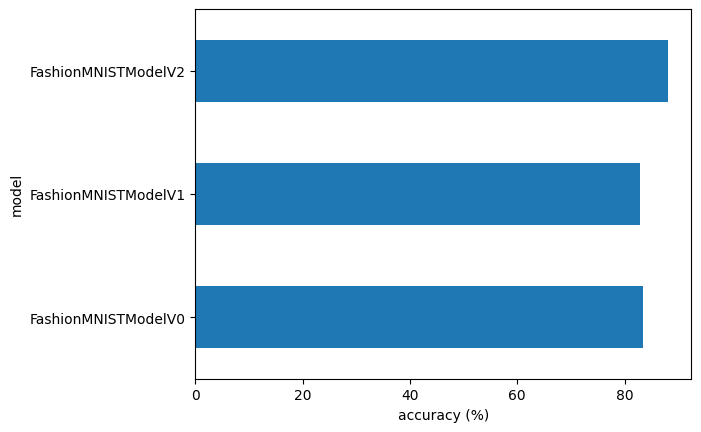

In [ ]:
# visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")


# make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data:list):

  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # prepare the sample ( add a batch dimension and pass to target device but since we are working on cpu no need )
      sample = torch.unsqueeze(sample,dim=0)
      # forward pass
      pred_logit = model(sample)
      # get prediction probaility
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)
      pred_probs.append(pred_prob)
  return torch.stack(pred_probs)

In [ ]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

In [ ]:
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
pred_probs[:2]

tensor([[7.4825e-02, 1.1892e-03, 7.2003e-02, 3.9192e-03, 4.3510e-03, 3.6057e-03,
         1.9142e-01, 1.4162e-03, 6.4346e-01, 3.8181e-03],
        [9.5627e-01, 2.3455e-05, 2.0072e-04, 3.8071e-03, 7.0880e-05, 2.6302e-07,
         3.9547e-02, 1.2044e-06, 8.1295e-05, 2.1841e-06]])

In [ ]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([8, 0, 1, 1, 5, 8, 5, 4, 6])

In [ ]:
test_labels

[6, 0, 1, 1, 5, 8, 5, 4, 6]

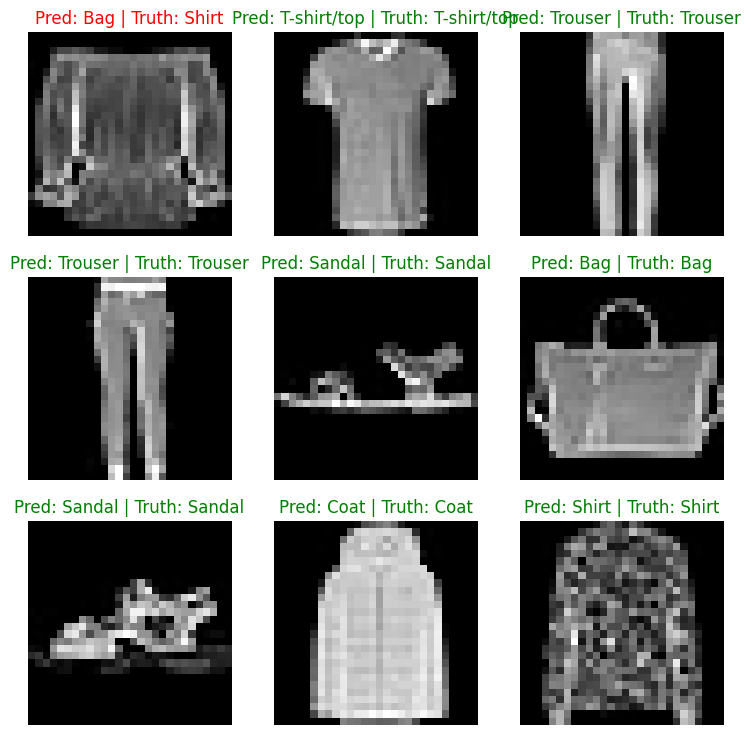

In [ ]:
plt.figure(figsize=(9,9))
nrows , ncolumns = 3,3
for i , sample in enumerate(test_samples):
  plt.subplot(nrows,ncolumns,i+1)
  plt.imshow(sample.squeeze(),cmap="gray")
  pred_label = class_names[pred_classes[i]]
  truth_label = class_names[test_labels[i]]
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  if pred_label == truth_label:
    plt.title(title_text,c="g")
  else:
    plt.title(title_text,c="r")
  plt.axis(False)



# evaluating with confusion matrix

confusion matrix is a fantastic way of evaluating our classification model
# link for more eval metrics :- https://www.learnpytorch.io/02_pytorch_classification/

1. make predictions with our trained model on the test dataset
2. make a confusion matrix `torchmetrics.ConfusionMatrix`
3. plot the confusion matrix `mlxtend.plotting.plot_confusion_matrix()`

In [ ]:
#1. make prediction with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc="making predictions..."):
    y_logit = model_2(X)
    y_pred = torch.argmax(y_logit.squeeze(),dim=1)
    y_preds.append(y_pred)
# concatenate list of predictions into a tensor
print(y_preds[:5]) # before concatenation pred labels are in batch so first 5 means first 5 batch's predicted labels are only shown
y_preds_tensor = torch.cat(y_preds)
print(y_preds_tensor[:5]) # after concatenation 'n' number of batches predicted labels which is in tensor are converted into single tensor so first 5 means first 5 labels predicted

making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 4, 8, 0, 2, 7, 7, 5,
        1, 2, 6, 0, 9, 3, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 0, 7, 6, 7, 2, 1, 4, 6, 4, 6, 5, 8, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 1, 4, 3, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
        0, 2, 5, 3, 6, 7, 1, 8]), tensor([0, 1, 4, 2, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4]), tensor([1, 5, 4, 1, 9, 1, 8, 6, 6, 1, 2, 5, 1, 0, 0, 0, 1, 6, 1, 3, 2, 2, 2, 4,
        1, 3, 5, 0, 4, 7, 9, 3])]
tensor([9, 2, 1, 1, 6])


**torch.stack creates new tensor and add the tensor in it where as torch.cat covert multiple tensors into single tensor**

In [ ]:
len(y_preds_tensor)

10000

In [ ]:
try:
  import torchmetrics,mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >=19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install torchmetrics -U mlxtend
  import mlxtend,torchmetrics
  print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.4/891.4 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 55.4 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.23.1
    Uninstalling mlxtend-0.23.1:
      Successfully uninstalled mlxtend-0.23.1
mlxtend version: 0.23.2


In [ ]:
import mlxtend
mlxtend.__version__

'0.23.2'

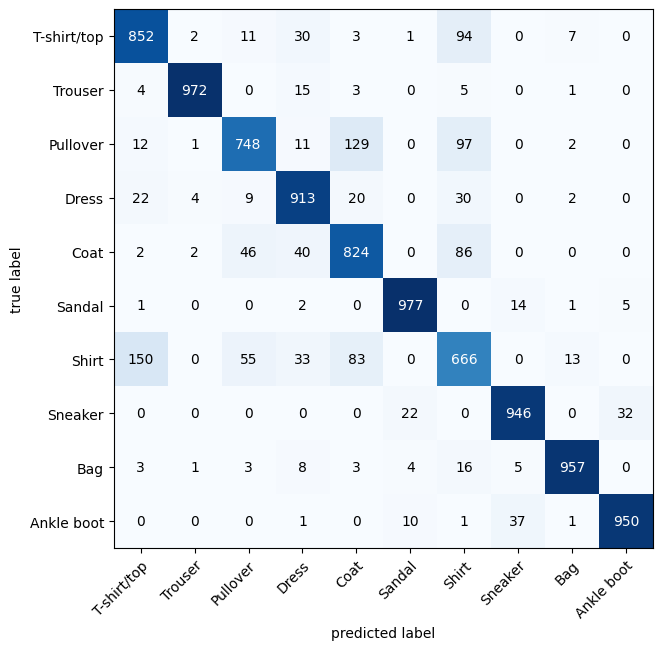

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names),task="multiclass")
confmat_tensor = confmat(preds=y_preds_tensor,
                         target=test_data.targets)

# 3. plot the confusion matrix
fig,ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                               figsize=(10,7),
                               class_names=class_names)


# save and load model

In [ ]:
from pathlib import Path

# create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)
# create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
#save the model state dict
print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

saving model to: models/03_pytorch_computer_vision_model_2.pth


In [ ]:
# create new instance
loaded_model = FashionMNISTModelV2(1,10,10)

# loading parameters from saved model
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model.state_dict()

<ipython-input-67-3cff7510eec9>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.3127,  0.3911, -0.4196],
                        [ 0.1556,  0.1815,  0.0878],
                        [-0.4420,  0.1430,  0.3166]]],
              
              
                      [[[-0.3738,  0.4791, -0.1338],
                        [ 0.2597,  0.4008,  0.0667],
                        [-0.1557,  0.3132,  0.0871]]],
              
              
                      [[[-0.3652, -0.0339, -0.0384],
                        [-0.6494, -0.6025,  0.2116],
                        [-0.8162, -0.6622, -0.1217]]],
              
              
                      [[[-0.7466, -0.8917, -0.7278],
                        [ 0.2914, -0.5231,  0.2517],
                        [ 0.2942, -0.0444,  0.3574]]],
              
              
                      [[[ 0.0132,  0.3515, -0.1108],
                        [-0.2418,  0.2368, -0.2215],
                        [-0.0970,  0.3388,  0.1292]]],
              
              
      

In [ ]:
# evaluate the loaded model
loaded_model_results = eval_model(model=loaded_model,
           loss=loss_fn,
           accuracy_fn=accuracy_fn,
           dataloader=test_dataloader)

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
loaded_model_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

# check if model results are close to each other

In [ ]:
torch.isclose(torch.tensor(model_2_result["model_loss"]),
              torch.tensor(loaded_model_results["model_loss"]),
              atol=1e-02)

tensor(True)

# EXCERCISES

# areas where computer vision used
 1. healthcare ( it analayze xrays , mri and ct scan to detect disease like tumors , cancer )
 2. visual search eg google lens where user can upload image and search
 3. fasial recognition

# overfiting in ML
means if model learns excessive than requirement then it start learning noise which lead poor performance while testing or on new data

it can be due to
1. simple data but complex model
2. too much training time on same data
3. data leakage betn training and testing data , etc

**ways to detect overfiting is below**

# K fold cross validation
1. **Divide the Data**: The entire dataset is randomly divided into 𝑘 equal-sized subsets, or "folds."

2.**Training and Testing**:
For each iteration (or fold):
Use k−1 folds as the training data.
Use the remaining fold as the testing (validation) data.
3. **Repeat**:
 This process is repeated k times, each time using a different fold as the testing data.

4.**Aggregate Results**:
 After completing all k folds, you take the average of the performance metrics from all the testing phases. This average gives you a more robust estimate of the model's performance on unseen data.

how can we prevent
1. using early stopping lib where it pauses the model early before it start learning noise
2. features selection or pruning :- it keeps imp features and eliminate the less imp or unwanted features
3. regularization :- this simply give less penalty to imp features and more penalty to less imp features , etc

In [ ]:
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
train_data = FashionMNIST(root="datas" , train=True,
                          transform=ToTensor(),
                          target_transform=None,
                          download=True)
test_data = FashionMNIST(root="datas" , train=False,
                          transform=ToTensor(),
                          target_transform=None,
                          download=True)


100%|██████████| 26.4M/26.4M [00:02<00:00, 13.2MB/s]


Extracting datas/FashionMNIST/raw/train-images-idx3-ubyte.gz to datas/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 227kB/s]


Extracting datas/FashionMNIST/raw/train-labels-idx1-ubyte.gz to datas/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.82MB/s]


Extracting datas/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to datas/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 13.4MB/s]

Extracting datas/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to datas/FashionMNIST/raw



In [ ]:
len(train_data),len(test_data)

(60000, 10000)

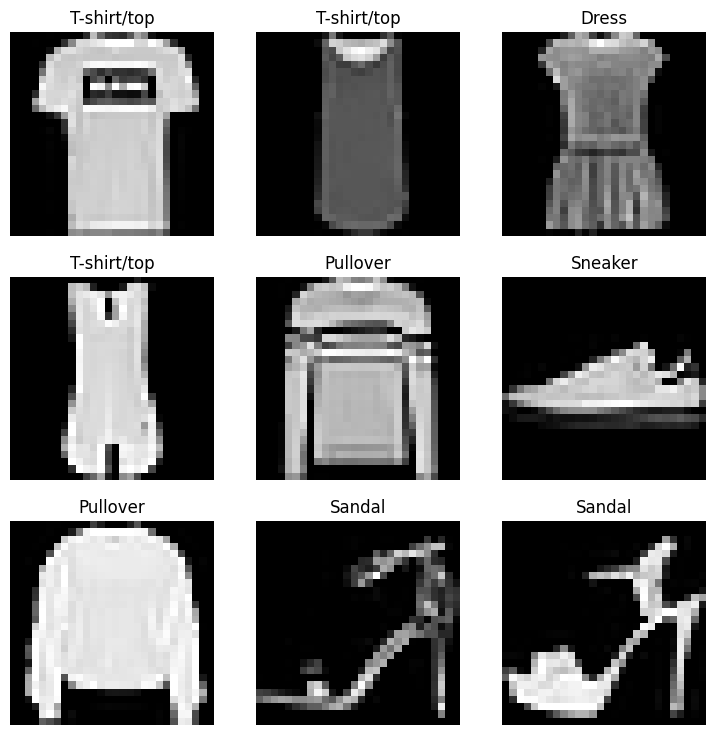

In [ ]:
torch.manual_seed(42)
plt.figure(figsize=(9,9))
nrows , ncolumns = 3,3
for i in range(1,nrows*ncolumns+1):
  image , label = train_data[i]
  plt.subplot(nrows,ncolumns,i)
  plt.imshow(image.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [ ]:
train_loaders = DataLoader(dataset=train_data,
                           batch_size=32,
                           shuffle=True)
test_loaders = DataLoader(dataset=test_data,
                           batch_size=32,
                           shuffle=False)
len(train_loaders),len(test_loaders)
for image , label in train_loaders:
  print(image.shape)
  print(label.shape)
  break

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [ ]:
class FashionMNISTModelV3(nn.Module):
  def __init__(self,
               input_features:int,
               output_features:int,
               hidden_units:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_features,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
      )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
      )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*4*4,
                  out_features=output_features)
      )
  def forward(self,x):
    z = self.conv_block_1(x)
    z = self.conv_block_2(z)
    z = self.classifier(z)
    return z
model_3 = FashionMNISTModelV3(input_features=1,
                              output_features=10,
                              hidden_units=10)
model_3


FashionMNISTModelV3(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=160, out_features=10, bias=True)
  )
)

In [ ]:
for img , labels in train_loaders:
  print(img.shape)
  break


torch.Size([32, 1, 28, 28])


In [ ]:
# torch.manual_seed(42)
# X_dumy = torch.rand(size=(32,1,28,28))
# model_3 = FashionMNISTModelV3(input_features=1,
#                               output_features=10,
#                               hidden_units=10)
# model_3_results = model_3(X_dumy)
# model_3_results[0]

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),lr=0.1)

In [ ]:
from timeit import default_timer as timer
from tqdm.auto import tqdm
torch.manual_seed(42)
torch.cuda.manual_seed(42) # only when we working on cuda device
start_time = timer()
epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_loss ,train_acc = 0,0
  model_3.train()
  for img,label in train_loaders:
    y_pred = model_3(img)
    loss = loss_fn(y_pred,label)
    acc = accuracy_fn(label,y_pred.argmax(dim=1))
    train_loss += loss
    train_acc += acc
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss /= len(train_loaders)
  train_acc /= len(train_loaders)
  print(f"train loss: {train_loss: .4f} | train acc: {train_acc: .2f}%")
  model_3.eval()
  test_loss , test_acc = 0,0
  with torch.inference_mode():
    for image , label in test_loaders:
      y_pred = model_3(image)
      loss = loss_fn(y_pred,label)
      acc = accuracy_fn(label,y_pred.argmax(dim=1))
      test_loss += loss
      test_acc += acc
    test_loss /= len(test_loaders)
    test_acc /= len(test_loaders)
    print(f"test loss: {test_loss:.4f} | test acc: {test_acc:.2f}%")
end_time = timer()
total_time = print_train_time(start=start_time,end=end_time)


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
train loss:  0.8041 | train acc:  70.48%
test loss: 0.4999 | test acc: 82.14%
Epoch: 1
---------
train loss:  0.4365 | train acc:  84.21%
test loss: 0.4038 | test acc: 85.21%
Epoch: 2
---------
train loss:  0.3856 | train acc:  85.89%
test loss: 0.3762 | test acc: 86.78%
Epoch: 3
---------
train loss:  0.3633 | train acc:  86.69%
test loss: 0.3600 | test acc: 86.87%
Epoch: 4
---------
train loss:  0.3473 | train acc:  87.23%
test loss: 0.3813 | test acc: 85.96%
Train time:  235.055


In [ ]:
model_3_results = eval_model(model=model_3,
                             loss=loss_fn,
                             accuracy_fn=accuracy_fn,
                             dataloader=test_loaders)
model_3_results , model_2_result

  0%|          | 0/313 [00:00<?, ?it/s]

({'model_name': 'FashionMNISTModelV3',
  'model_loss': 0.38133519887924194,
  'model_acc': 85.96246006389777},
 {'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.32718968391418457,
  'model_acc': 88.06908945686901})

for confusion matirx
1. make predictions with trained model
2. set a confusion matrix ( `torchmetrics.ConfusionMatrix` )
3. plot a connfusion matrix ( `mlxtend.plotting.plot_confusion_matrix`)

In [ ]:
class_names = test_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# 1. making predictions
y_preds =[]
torch.manual_seed(42)
model_3.eval()
with torch.inference_mode():
  for img,label in tqdm(test_loaders,desc="making predictions..."):
    y_pred = model_3(img)
    y_logist = y_pred.argmax(dim=1)
    y_preds.append(y_logist)
  y_preds_tensor = torch.cat(y_preds)


making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. setting up confusion matrix
confmat  = ConfusionMatrix(num_classes=len(class_names),
                           task="multiclass")
confmat_tensor = confmat(preds=y_preds_tensor,
                         target=test_data.targets)

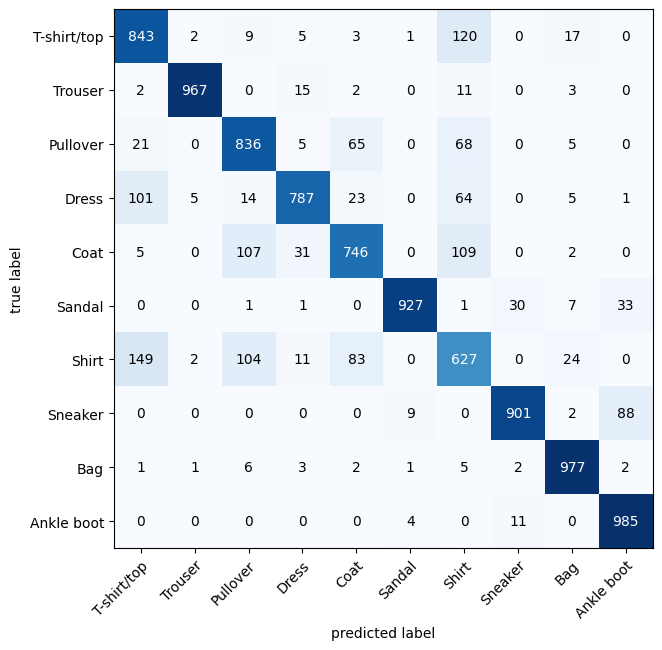

In [ ]:
# 3. plotting confusion matirx
fig , ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                 figsize=(10,7),
                                 class_names=class_names)

In [ ]:
x = torch.rand(size=(1,3,64,64))
conv_layer = nn.Conv2d(3,10,3,1,0)
conv_layer(x).shape

torch.Size([1, 10, 62, 62])